# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [3]:
import sys

sys.path.append("..")

from imp import reload

import numpy as np
import pandas as pd

from helper_functions import data_utils, preprocessing
# from helper_functions import config, data_utils, evaluation, plot, preprocessing

# import lightgbm as lgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [4]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')
app_normalized = preprocessing.categorical_columns(app_normalized)

In [5]:
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [6]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  PRODUCT                      49935 non-null  category
 12  AGE                          49935 non-null  category
 13  H

### Encoding

- We do the encoding process for....

- Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [7]:
app_dum = preprocessing.encoding(app_normalized, True) # True for pandas get_dummies
# app_enc = preprocessing.encoding(app_normalized, False) # False for different encoder

In [8]:
print(app_dum.columns)

Index(['PAYMENT_DAY_1_14', 'APPLICATION_SUBMISSION_TYPE_Web', 'SEX_M',
       'MARITAL_STATUS_other', 'MARITAL_STATUS_single', 'QUANT_DEPENDANTS_1',
       'QUANT_DEPENDANTS_2', 'QUANT_DEPENDANTS_3', 'RESIDENCIAL_STATE_AL',
       'RESIDENCIAL_STATE_AM', 'RESIDENCIAL_STATE_AP', 'RESIDENCIAL_STATE_BA',
       'RESIDENCIAL_STATE_CE', 'RESIDENCIAL_STATE_DF', 'RESIDENCIAL_STATE_ES',
       'RESIDENCIAL_STATE_GO', 'RESIDENCIAL_STATE_MA', 'RESIDENCIAL_STATE_MG',
       'RESIDENCIAL_STATE_MS', 'RESIDENCIAL_STATE_MT', 'RESIDENCIAL_STATE_PA',
       'RESIDENCIAL_STATE_PB', 'RESIDENCIAL_STATE_PE', 'RESIDENCIAL_STATE_PI',
       'RESIDENCIAL_STATE_PR', 'RESIDENCIAL_STATE_RJ', 'RESIDENCIAL_STATE_RN',
       'RESIDENCIAL_STATE_RO', 'RESIDENCIAL_STATE_RR', 'RESIDENCIAL_STATE_RS',
       'RESIDENCIAL_STATE_SC', 'RESIDENCIAL_STATE_SE', 'RESIDENCIAL_STATE_SP',
       'RESIDENCIAL_STATE_TO', 'FLAG_RESIDENCIAL_PHONE_Y',
       'MONTHS_IN_RESIDENCE_6_12', 'MONTHS_IN_RESIDENCE_>_12', 'FLAG_EMAIL_1',
      

Best Score for Logistic Regression:  0.5871272350809174
model score for Logistic Regression: 0.579


Model Performance metrics:
------------------------------
Accuracy: 0.5751476919995995
Precision: 0.8044315992292871
Recall: 0.5639605565311361
F1 Score: 0.6630667831334869

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      7403
           1       0.33      0.61      0.43      2584

    accuracy                           0.58      9987
   macro avg       0.57      0.59      0.54      9987
weighted avg       0.68      0.58      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4175  3228
1  1015  1569


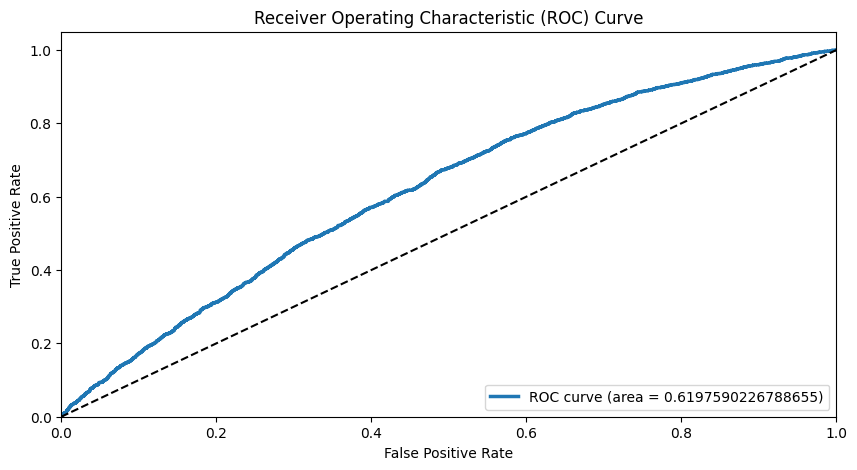

Best Score for Logistic Regression:  0.5871272350809174


In [9]:
# using get_dummies
lr_model_enc = preprocessing.model_logistic_regression(app_dum, True)

Best Score for CatBoost Classifier:  0.5847721421199059
Model score for CatBoost Classifier: 0.560


Model Performance metrics:
------------------------------
Accuracy: 0.5526184039251026
Precision: 0.8052839608903682
Recall: 0.5228961231933
F1 Score: 0.6340704340704342

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      0.52      0.63      7403
           1       0.32      0.64      0.42      2584

    accuracy                           0.55      9987
   macro avg       0.56      0.58      0.53      9987
weighted avg       0.68      0.55      0.58      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  3871  3532
1   936  1648


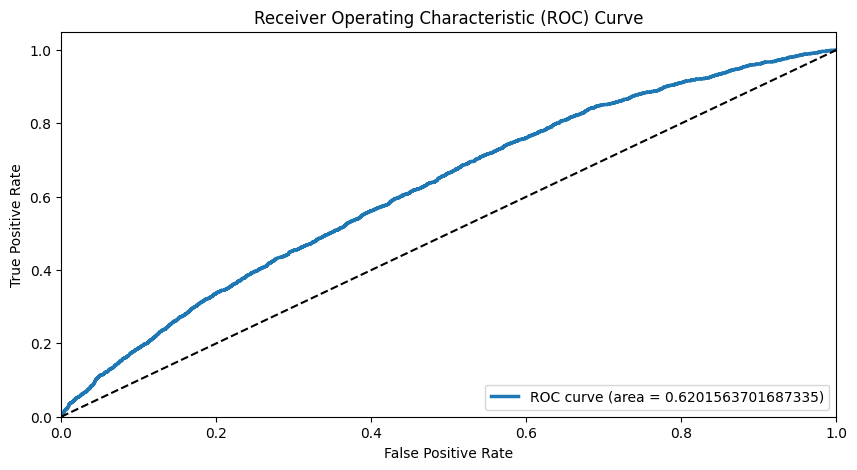

Best Score for CatBoost Classifier:  0.5847721421199059


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002B5C102B9A0>,
             param_grid={'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 0.2]})

In [10]:
preprocessing.model_catboost_classifier(app_dum)

### Comparing different models

#### MSE VS R²

In [11]:
# reload(preprocessing)
preprocessing.basic_models(app_dum)

c:\Users\Yessid\miniconda3\envs\final\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                    Model       MSE        R²
0       Linear Regression  0.239810 -0.250364
1     Logistic Regression  0.425053 -1.216218
2     KNeighborsRegressor  0.286204 -0.492264
3    Gaussian Naive Bayes  0.471012 -1.455852
4  Multi Layer Perceptron  0.306286 -0.596973
5                CatBoost  0.187573  0.022000
6        Ridge Regression  0.239738 -0.249988
7        LASSO Regression  0.250000 -0.303496
8          Decission Tree  0.466712 -1.433432
9           Random Forest  0.270495 -0.410358


```
 |                   Model|       MSE|        R²
0|       Linear Regression|  0.239810| -0.250364
1|     Logistic Regression|  0.425053| -1.216218
2|     KNeighborsRegressor|  0.286204| -0.492264
3|    Gaussian Naive Bayes|  0.471012| -1.455852
4|  Multi Layer Perceptron|  0.306286| -0.596973
5|                CatBoost|  0.187573|  0.022000
6|        Ridge Regression|  0.239738| -0.249988
7|        LASSO Regression|  0.250000| -0.303496
8|          Decission Tree|  0.467938| -1.439824
9|           Random Forest|  0.270495| -0.410358
```

- The Mean Squared Error (MSE) measures the average of squared errors between the predicted values and the actual values. A lower MSE indicates better accuracy, as it means the model's predictions are closer to the actual values.

- R² (R-squared) is a metric that indicates the proportion of variance in the target variable that is explained by the predictor variables. It provides an indication of how well the model fits the data. A negative R² value suggests that the model does not fit the data well.

- Among the models listed, CatBoost seems to perform the best. It has the lowest MSE (0.187573) and the highest R² (0.022000). This indicates that CatBoost has achieved the best balance between accuracy and explanatory power compared to the other models.

- It's important to note that the evaluation metrics can vary depending on the specific dataset and the problem being solved. It's always a good practice to cross-validate the models and consider other factors, such as interpretability and computational cost, when choosing the best model for your particular problem.





